In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
def warmUpExercise():
    return(np.identity(5))

In [3]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [4]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

In [5]:
population=data[:,0]
profit=data[:,1]
m=len(population)
print(population[:5])
print(profit[:5])

[ 6.1101  5.5277  8.5186  7.0032  5.8598]
[ 17.592    9.1302  13.662   11.854    6.8233]


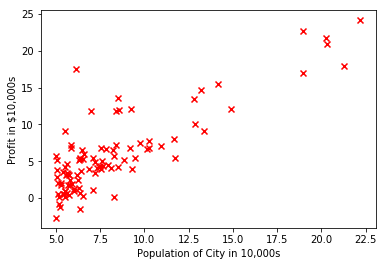

In [6]:
plt.scatter(population,profit,marker='x',c='r')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [7]:
x=population
y=profit
x=np.reshape(x,(-1,1))
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
theta_0=model.intercept_
theta_1=model.coef_
print('theta_0',theta_0)
print('theta_1',theta_1[0])

theta_0 -3.89578087831
theta_1 1.19303364419


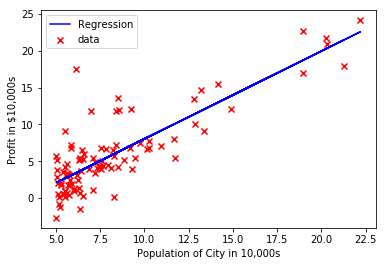

In [9]:
plt.scatter(x,y,marker='x',c='r', label='data')
plt.plot(x, model.predict(x),c='b',label='Regression')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.show()

In [10]:
#compute the cost of linear regression using theta 
#as the parameter for linear regression to fit the data points in X and y
def computeCost(X,Y,theta=[[0],[0]]):
    J=0
    h=X.dot(theta)
    J=(1/(2*m))*np.sum(np.square(h-Y))
    return J

In [11]:
X1 = np.c_[np.ones(data.shape[0]),data[:,0]]
y1 = np.c_[data[:,1]]

In [12]:
np.round(computeCost(X1,y1),decimals=2)

32.07

In [13]:
np.around(computeCost(X1,y1,[[-1],[2]]),decimals=2)

54.240000000000002

In [14]:
print(m)

97


In [15]:
def gradientDescent(X,Y,theta,alpha,num_iters):
    J_his=np.zeros(num_iters)
    for i in range(num_iters):
        h=X.dot(theta)
        #print(h.shape)
        theta=theta-alpha*(1/m)*(X.T.dot(h-Y))
        J_his[i]=computeCost(X,Y,theta)
    return theta,J_his

In [16]:
iterations = 1500;
alpha = 0.01;
th=[[0],[0]]
X1.shape
theta,J_his=gradientDescent(X1,y1,th,alpha,iterations)

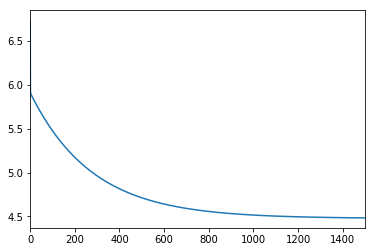

In [17]:
plt.plot(np.arange(iterations),J_his)
plt.xlim(0,1500)
plt.show()

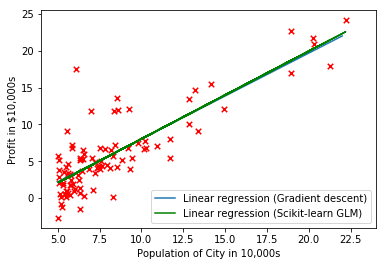

In [18]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X1[:,1], y1, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
plt.plot(x, model.predict(x),c='g',label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);
plt.show()

In [19]:
predict1=np.array([1,3.5]).dot(theta)
print('For population = 35,000, we predict a profit of',predict1[0]*10000)

For population = 35,000, we predict a profit of 4519.7678677


In [20]:
predict2=np.array([1,7]).dot(theta)
print('For population = 70,000, we predict a profit of',predict2[0]*10000)

For population = 70,000, we predict a profit of 45342.4501294


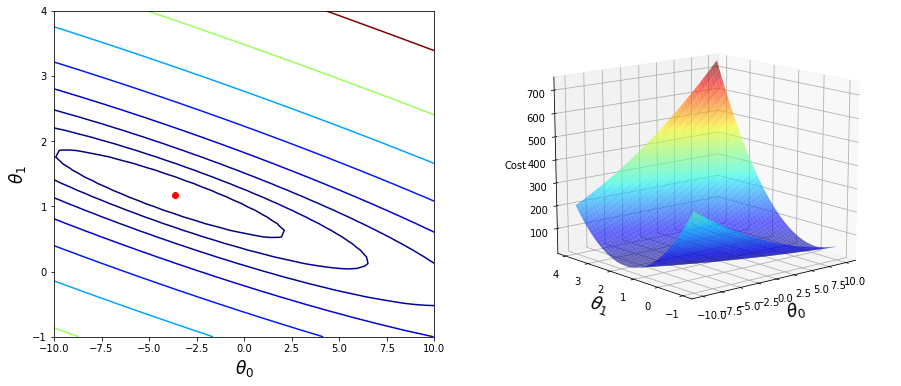

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X1,y1, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)
plt.show()